# LAMMPS Tutorials 01 nvt. Running your first LAMMPS simulation!

### Author: ABDELLAH TAHIRI 

Please contact me if you have a problem with this tutorial, so I can modify in Github.  I have added FAQs, and will update my versions of LAMMPS in the future to keep the scripts current.

The latest version of this [Jupyter Notebook](http://ipython.org/notebook.html) tutorial is available at https://github.com/athiri78/DM/edit/main/LAMMPS-Tutorials.



***

## Description:
<a id="Sec1"></a>
The script is designed to analyze and simulate the dynamics of a system consisting of two types of particles within a cylindrical geometry. It focuses on:
<br>
*Managing particle distributions by deleting specific subsets of atoms based on their regions and types.
</br>
*Monitoring the population of particles in a specified region over time.
</br>
*Calculating and analyzing the coordination number between particle types.
</br>
*Simulating the system dynamics under the influence of a Langevin thermostat and monitoring atomistic behavior over a defined period.



## Step 1: Download an Input File
<a id="Step1"></a>

This input script was run using the Aug 2024 version of LAMMPS. Changes in some commands may require revision of the input script. To get the input file, you have a few options:

*  Copy the text below and paste it into a text file, `cylindre_LGV.in`. Use the `Paste Special` command with unformatted text into the file. 
*  Or, I added the command `%%writefile mixed.in` to the Jupyter Notebook which should just do everything for you!




In [10]:
%%writefile cylindre_LGV.in
#######################################################################
#######################################################################

#######################################################################
# PART A - ENERGY MINIMIZATION
#######################################################################

# 1) Initialization
units lj
dimension 3
atom_style atomic
pair_style lj/cut 2.5
boundary p p p

########################
# 2) System Definition
read_data minimized_coordinate.data

# Define regions
region region_cylinder_in cylinder z 0 0 10 INF INF side in
region region_cylinder_out cylinder z 0 0 10 INF INF side out

# Define groups based on atom types and regions
group group_type_1 type 1
group group_type_2 type 2
group group_region_in region region_cylinder_in
group group_region_out region region_cylinder_out

# Intersect groups with regions
group group_type_1_in intersect group_type_1 group_region_in
group group_type_2_out intersect group_type_2 group_region_out

# Delete specific atoms in the defined groups
delete_atoms group group_type_1_in
delete_atoms group group_type_2_out

##########################
# 3) Define Variables and Outputs
# Variables for counting atoms in region_cylinder_in
variable n_type1_in equal count(group_type_1,region_cylinder_in)
variable n_type2_in equal count(group_type_2,region_cylinder_in)

# Fixes to output population data over time
fix myat1 all ave/time 10 200 2000 v_n_type1_in file output-population1vstime.dat
fix myat2 all ave/time 10 200 2000 v_n_type2_in file output-population2vstime.dat

# Compute coordination number between groups
compute coor12 group_type_1 coord/atom cutoff 2.0 group group_type_2
compute sumcoor12 all reduce ave c_coor12
fix myat3 all ave/time 10 200 2000 c_sumcoor12 file coordinationnumber12.dat

##########################
# 4) Run Setup
# Initial velocity and fixes
velocity all create 1.0 4928459 mom yes rot yes dist gaussian
fix mynve all nve
fix mylgv all langevin 1.0 1.0 0.1 1530917 zero yes
timestep 0.005

# Dump and Run
dump mydmp all atom 10000 dump.min1.lammpstrj
run 10000

##########################
# 5) Final Run and Data Output
run 300000
write_data mixed.data



print "All done!"

Overwriting cylindre_LGV.in


Awesome!  That little script should have written the above text to the file `nvt.in`.  To check, let's execute a command on the present directory listing all files that end in `*.in`.

In [6]:
!dir *.in

 Le volume dans le lecteur C n’a pas de nom.
 Le numéro de série du volume est DC02-C1A6

 Répertoire de C:\Users\pc\Desktop\M2A

21/11/2024  10:17             1 774 calc_fcc.in
12/11/2024  14:40             1 565 calc_fcc_ver1.in
09/11/2024  14:10             1 233 calc_fcc_ver2.in
23/12/2024  17:51             3 143 cylindre.in
23/12/2024  21:10             1 728 cylindre_LGV.in
03/12/2024  12:18             1 141 Diatomic.in
03/12/2024  12:22             1 113 Diatomic1.in
12/11/2024  16:49             1 177 lj.in
12/11/2024  17:08               533 ljbarosta.in
12/11/2024  17:19             1 389 ljovito.in
12/11/2024  18:10             1 018 ljrdf.in
12/11/2024  16:59               522 ljthermo.in
25/11/2024  12:17             2 875 minimization.in
25/11/2024  12:45             3 080 minimization1.in
03/12/2024  11:44             1 141 mixed.in
26/11/2024  15:15             3 352 nve.in
26/11/2024  16:50             4 909 nve_npt_nvt.in
23/11/2024  15:26             3 010 nvt.in
 

***
## Step 2: Running LAMMPS
### Run this using LAMMPS in Jupyter Notebook
We can actually run this from Jupyter Notebook.  Let's try it.

In [8]:
!lmp -in cylindre_LGV.in  -pk omp 8 -sf omp 

LAMMPS (29 Aug 2024 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\LAMMPS 64-bit 29Aug2024\plugins
set 8 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
Reading data file ...
  orthogonal box = (-20 -20 -20) to (20 20 20)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  1150 atoms
  reading velocities ...
  1150 velocities
  read_data CPU = 0.040 seconds
1000 atoms in group group_type_1
150 atoms in group group_type_2
149 atoms in group group_region_in
1001 atoms in group group_region_out
0 atoms in group group_type_1_in
1 atoms in group group_type_2_out
Deleted 0 atoms, new total = 1150
Deleted 1 atoms, new total = 1149

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Your simulation uses code contributions which should be cited:
- Type Label Framework: https://doi.org/10.1021/acs.jpcb.3c08419
The log file lists these cita

Sweet!

If you want to view the entire file (opening `log.lammps` in Notepad), then:

In [14]:
!type log.lammps

LAMMPS (29 Aug 2024 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\LAMMPS 64-bit 29Aug2024\plugins
package omp 8
set 8 OpenMP thread(s) per MPI task
using multi-threaded neighbor list subroutines
#######################################################################
#######################################################################
# PART A - ENERGY MINIMIZATION
#####################################################################
# 1) Initialization
units lj
dimension 3
atom_style atomic
pair_style lj/cut 2.5
boundary p p p
######################
# 2) System definition
read_data minimized_coordinate.data
Reading data file ...
  orthogonal box = (-20 -20 -20) to (20 20 20)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  1150 atoms
  reading velocities ...
  1150 velocities
  read_data CPU = 0.040 seconds
region region_cylinder_in cylinder z 0 0 10 INF INF side in

In [14]:
!type dump.lam


Le fichier spécifié est introuvable.


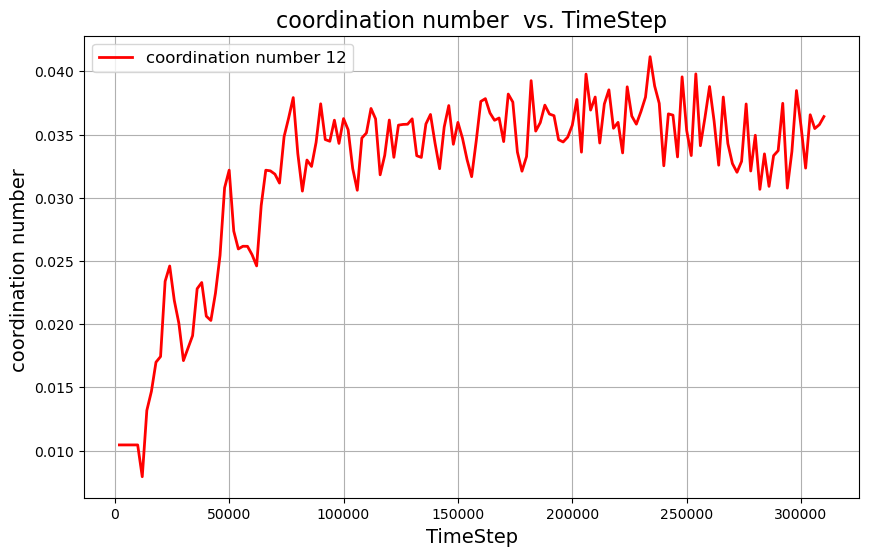

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from file.data
input_file = "coordinationnumber12.dat"  # Replace with the file containing the data
data = np.loadtxt(input_file, comments="#")

# Extract relevant columns: Step, KE, PE
TimeStep = data[:, 0]  # Column 0: Steps
#ke = data[:, 2]     # Column 2: Kinetic Energy (KE)
c_sumcoor12 = data[:, 1]     # Column 1: Potential Energy (PE)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot KE with red line
plt.plot(TimeStep, c_sumcoor12, color="red", label="coordination number 12", linewidth=2)

# Plot PE with blue line
#plt.plot(steps, pe, color="blue", label="Potential Energy (PE)", linewidth=2)

# Add labels, title, and legend
plt.xlabel("TimeStep", fontsize=14)
plt.ylabel("coordination number ", fontsize=14)
plt.title("coordination number  vs. TimeStep", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Save the plot to a file (optional)
#plt.savefig("energy_plot.png", dpi=300)

# Display the plot
plt.show()

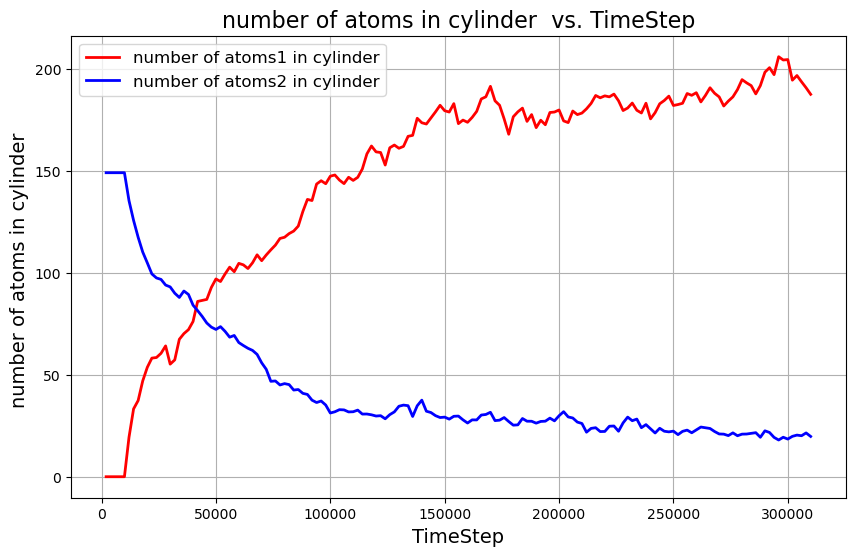

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Load data from file.data
input_file1 = "output-population1vstime.dat"  # Replace with the file containing the data
input_file2 = "output-population2vstime.dat"
data1 = np.loadtxt(input_file1, comments="#")
data2 = np.loadtxt(input_file2, comments="#") 

# Extract relevant columns: Step, KE, PE
TimeStep = data1[:, 0]  # Column 0: Steps
TimeStep = data2[:, 0]
#ke = data[:, 2]     # Column 2: Kinetic Energy (KE)
v_n_type1_in = data1[:, 1]     # Column 1: Potential Energy (PE)
v_n_type2_in = data2[:, 1] 

# Create the plot
plt.figure(figsize=(10, 6))

# Plot KE with red line
plt.plot(TimeStep, v_n_type1_in,  color="red", label="number of atoms1 in cylinder", linewidth=2)
plt.plot(TimeStep, v_n_type2_in, color="blue", label="number of atoms2 in cylinder", linewidth=2)

# Plot PE with blue line
#plt.plot(steps, pe, color="blue", label="Potential Energy (PE)", linewidth=2)

# Add labels, title, and legend
plt.xlabel("TimeStep", fontsize=14)
plt.ylabel("number of atoms in cylinder ", fontsize=14)
plt.title("number of atoms in cylinder  vs. TimeStep", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Save the plot to a file (optional)
#plt.savefig("energy_plot.png", dpi=300)

# Display the plot
plt.show()

***
exercise 

Perform the following modifications to the script and observe the changes in system behavior.

Change the Cylinder Dimensions

Modify the radius of region_cylinder_in from 10 to 15.
Predict how this change will affect:
The number of atoms in the cylindrical region (n_type1_in and n_type2_in variables).
The coordination number between type 1 and type 2 atoms.
Run the simulation and compare your predictions with the output data.
Modify the Coordination Number Calculation

Increase the cutoff in the compute coor12 command from 2.0 to 3.0.
Predict how this change will affect the coordination number (coordinationnumber12.dat).
Analyze the results after running the simulation.
Test with Different Atom Types

Introduce a third atom type (type 3) into the system. Update the minimized_coordinate.data file to include this new type.
Add a spherical region (region_sphere) with a radius of 5 and center at (0, 0, 0).
Create a new group for type 3 atoms inside the spherical region and count these atoms over time using fix ave/time.
Extend the Simulation Runtime

Increase the total number of simulation steps from 300000 to 500000.
Add a new dump file to save the atom trajectory at the final timestep (dump.final.lammpstrj).
Observe how the system evolves over the longer simulation time.

***
## Exercise
<br>

Learn how to set up, modify, and analyze a simulation for energy minimization of a two-species system distributed in a cylindrical region using the Lennard-Jones potential.
<br>

1- Understanding the Script:
<br>
Read through the provided LAMMPS script. Pay close attention to the comments to understand the purpose of each section.
Identify the following:
The regions defined in the system.
The properties of the two atom types (e.g., masses, interaction parameters).
<br>
2- Modify the Script:
<br>

Change the radius of the inner cylindrical region (region_cylinder_in) from 10 to 15.
Increase the number of type 1 atoms created in region_cylinder_out to 2000.
Update the thermo command to print thermodynamic data every 20 steps instead of 10.
<br>
Run the Simulation:
<br>
3- Use LAMMPS to run the script after making the modifications.
<br>
Observe the output files:
Check the thermodynamic output in the console.
Visualize the dump.min.lammpstrj file in a visualization tool (e.g., OVITO or VMD).
<br>
3- Analyze the Results:
<br>
Answer the following questions based on your observations:

a- How did increasing the cylinder radius affect the atom populations and coordination numbers?
What was the impact of increasing the cutoff distance for the coordination number calculation?
How did the introduction of a third atom type and a spherical region change the simulation?
Did extending the simulation runtime reveal any new trends or behaviors?



***
## Tutorial Links

[Click here to open the next tutorial](LAMMPS-Tutorials-02.ipynb)